In [ ]:
import pandas as pd

In [ ]:
!wget https://github.com/owid/covid-19-data/raw/master/public/data/owid-covid-data.csv

--2023-01-06 07:54:43--  https://github.com/owid/covid-19-data/raw/master/public/data/owid-covid-data.csv
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv [following]
--2023-01-06 07:54:44--  https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 69259997 (66M) [text/plain]
Saving to: ‘owid-covid-data.csv.1’

owid-covid-data.csv 100%[===================>]  66.05M   133MB/s    in 0.5s    

2023-01-06 07:54:44 (133 MB/s) - ‘owid-covid-data.csv.1’ saved [6925

In [ ]:
#!unzip owid-covid-data.zip
covid_data = pd.read_csv('owid-covid-data.csv')
#source https://ourworldindata.org/coronavirus-source-data
covid_data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [ ]:
covid_data = covid_data[covid_data['date']=='2023-01-02'] #Focus on a day from this week
#covid_data = covid_data.loc[covid_data.location!='World'] #sums it all up, redundent
covid_data  = covid_data.loc[~covid_data.continent.isna()] #sums it all up, redundent
covid_data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
1043,AFG,Asia,Afghanistan,2023-01-02,207627.0,11.0,27.000,7849.0,0.0,0.429,...,NaN,37.746,0.50,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3147,ALB,Europe,Albania,2023-01-02,333812.0,1.0,8.714,3595.0,0.0,0.000,...,51.2,NaN,2.89,78.57,0.795,2842318.0,NaN,NaN,NaN,NaN
4193,DZA,Africa,Algeria,2023-01-02,271229.0,0.0,4.429,6881.0,0.0,0.000,...,30.4,83.741,1.90,76.88,0.748,44903228.0,NaN,NaN,NaN,NaN
5233,AND,Europe,Andorra,2023-01-02,47751.0,0.0,9.286,165.0,0.0,0.000,...,37.8,NaN,NaN,83.73,0.868,79843.0,NaN,NaN,NaN,NaN
6255,AGO,Africa,Angola,2023-01-02,105095.0,0.0,17.429,1930.0,0.0,0.286,...,NaN,26.664,NaN,61.15,0.581,35588996.0,NaN,NaN,NaN,NaN


# Lets look at the data and make sure it makes sense to us

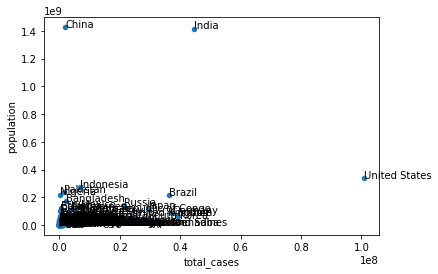

In [ ]:
def plot_scatter_w_annotations(df, x, y, val):
  ax = df[['total_cases','population','location']].plot(kind='scatter', x='total_cases', y='population')
  a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
  for i, point in a.iterrows():
    ax.text(point['x'], point['y'], str(point['val']))

plot_scatter_w_annotations(covid_data,covid_data.total_cases, covid_data.population, covid_data.location)


# Some dirty data preprocessing

In [ ]:
del covid_data['iso_code'] #string features, not importnant
del covid_data['continent'] #string features, can be converted to 1-hot in next iteration
del covid_data['date'] #for now we have only single day
covid_data = covid_data.set_index('location')
covid_data = covid_data.apply(pd.to_numeric, errors='coerce')
covid_data = covid_data.fillna(covid_data.mean()) #dirty preprossing or not?
covid_data = covid_data.dropna(axis=1,how='all')


In [ ]:
covid_data.head()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population
location,,,,,,,,,,,,,,,,,,,,,
Afghanistan,207627.0,11.0,27.000,7849.0,0.0,0.429,5048.218,0.267,0.656,190.840,...,13.8792,597.029,9.59,10.819863,32.897917,37.746000,0.50000,64.83,0.511,41128772.0
Albania,333812.0,1.0,8.714,3595.0,0.0,0.000,117443.580,0.352,3.066,1264.813,...,1.1000,304.195,10.08,7.100000,51.200000,50.165947,2.89000,78.57,0.795,2842318.0
Algeria,271229.0,0.0,4.429,6881.0,0.0,0.000,6040.301,0.000,0.099,153.241,...,0.5000,278.364,6.73,0.700000,30.400000,83.741000,1.90000,76.88,0.748,44903228.0
Andorra,47751.0,0.0,9.286,165.0,0.0,0.000,598061.195,0.000,116.300,2066.556,...,13.8792,109.135,7.97,29.000000,37.800000,50.165947,3.07414,83.73,0.868,79843.0
Angola,105095.0,0.0,17.429,1930.0,0.0,0.286,2953.020,0.000,0.490,54.230,...,13.8792,276.045,3.94,10.819863,32.897917,26.664000,3.07414,61.15,0.581,35588996.0


Each country is an instance = point. We want to classify countries into anomalies or not

# Back to slides

In [ ]:
from sklearn.svm import OneClassSVM
svm_clf = OneClassSVM().fit(covid_data)
print(svm_clf.predict(covid_data))
#What is the limitation of this output?

[ 1  1  1 -1  1 -1 -1 -1  1 -1  1  1  1 -1 -1 -1 -1  1  1 -1  1 -1 -1  1
 -1  1  1 -1 -1 -1 -1  1  1  1  1 -1 -1 -1  1  1  1 -1  1 -1  1 -1  1  1
 -1  1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1  1 -1  1 -1 -1 -1 -1 -1 -1  1 -1 -1
  1  1  1 -1  1 -1 -1 -1 -1  1  1  1 -1  1  1  1  1 -1 -1 -1 -1  1  1 -1
 -1 -1  1 -1  1  1  1 -1 -1  1 -1  1  1  1  1  1  1 -1 -1 -1 -1  1  1 -1
 -1  1 -1 -1  1 -1 -1 -1  1 -1  1 -1 -1  1  1  1  1 -1  1  1 -1  1  1  1
 -1  1  1 -1  1  1 -1 -1  1  1  1  1  1 -1 -1  1  1  1 -1  1 -1 -1 -1 -1
 -1 -1 -1 -1  1  1  1 -1  1  1  1  1 -1  1 -1 -1  1  1  1  1 -1  1  1  1
  1  1 -1 -1 -1  1 -1 -1  1 -1 -1 -1  1  1  1 -1 -1 -1  1 -1 -1  1 -1 -1
  1  1  1]


In [ ]:
print('mean deaths per million',covid_data.total_deaths_per_million.mean())

svm_scores = svm_clf.score_samples(covid_data)
svm_scores = pd.DataFrame({'score': svm_scores,'new_deaths':covid_data.new_deaths,'population':covid_data.population.astype(int),'total_deaths_per_million':covid_data.total_deaths_per_million}, index=covid_data.index).sort_values('score')
svm_scores.head(10)

#What is the limitation of this output?

# India's numbers? https://www.forbes.com/sites/lipiroy/2020/06/25/infected-india-the-true-toll-of-coronavirus-in-the-worlds-2nd-most-populated-country/?sh=3efa475550fb

mean deaths per million 1233.2242009345794


,score,new_deaths,population,total_deaths_per_million
location,,,,
China,1.000000,0.000000,1425887360,3.676000
India,1.000000,0.000000,1417173120,374.483000
United States,59.477778,5.000000,338289856,3230.499000
Malta,69.172186,0.000000,533293,1531.991000
Estonia,69.337848,0.000000,1326064,2152.234000
Lithuania,69.849632,4.000000,2750058,3449.018000
Kyrgyzstan,70.120631,0.000000,6630621,451.089000
Croatia,70.470837,16.000000,4030361,4372.561000
Northern Cyprus,70.507412,6.165049,382836,1233.224201


# Isolation forest

In [ ]:
print('mean deaths per million',covid_data.total_deaths_per_million.mean())
from sklearn.ensemble import IsolationForest

isloation_clf = IsolationForest(random_state=0).fit(covid_data)
isloation_clf.predict(covid_data)
#But what if i have time only to look at 1? Which one should i pick?

mean deaths per million 1233.2242009345794


array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [ ]:
iso_scores = isloation_clf.score_samples(covid_data)
iso_scores = pd.DataFrame({'score': iso_scores,'new_deaths':covid_data.new_deaths,'population':covid_data.population.astype(int),'total_deaths_per_million':covid_data.total_deaths_per_million}, index=covid_data.index).sort_values('score')
iso_scores.head(10)

#UAE: https://graphics.reuters.com/world-coronavirus-tracker-and-maps/countries-and-territories/united-arab-emirates/

# And another question is: what if i want to remove all the anomalies and i don't have time too look at any of them?

,score,new_deaths,population,total_deaths_per_million
location,,,,
Japan,-0.695858,208.0,123951696,465.738
France,-0.641868,252.0,67813000,2393.096
United States,-0.631377,5.0,338289856,3230.499
Germany,-0.601395,249.0,83369840,1939.718
Bangladesh,-0.598765,0.0,171186368,171.976
India,-0.576728,0.0,1417173120,374.483
South Korea,-0.546754,29.0,51815808,623.381
Israel,-0.530696,8.0,9449000,1275.796
Malaysia,-0.525481,1.0,33938216,1086.032


# Back to slides

# LocalOutlierFactor

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
lof_clf = LocalOutlierFactor()
lof_clf.fit_predict(covid_data)


array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1, -1, -1,  1,  1,  1,  1, -1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1, -1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1, -1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1])

In [ ]:
lof_clf.negative_outlier_factor_[:10]
#negative_outlier_factor_ndarray of shape (n_samples,)
#The opposite LOF of the training samples. The higher, the more normal. Inliers tend to have a LOF score close to 1 (negative_outlier_factor_ close to -1), while outliers tend to have a larger LOF score.

array([-1.12313179, -1.07549936, -1.1489845 , -1.18529034, -1.05822273,
       -0.95381334, -1.03537577, -1.30944713, -1.07089634, -0.99804656])

In [ ]:
lof_scores = lof_clf.negative_outlier_factor_ #The opposite LOF of the training samples. Outliers tend to have a larger LOF score.
lof_scores = pd.DataFrame({'score': lof_scores,'new_deaths':covid_data.new_deaths,'population':covid_data.population.astype(int),'total_deaths_per_million':covid_data.total_deaths_per_million}, index=covid_data.index).sort_values('score')
lof_scores.head(10)

# And another question is: what if i want to remove all the anomalies and i don't have time to look at any of them?

,score,new_deaths,population,total_deaths_per_million
location,,,,
Macao,-106.745063,0.000000,695180,18.700000
China,-48.384979,0.000000,1425887360,3.676000
India,-38.167308,0.000000,1417173120,374.483000
Northern Cyprus,-10.975921,6.165049,382836,1233.224201
Bulgaria,-6.920385,0.000000,6781955,5619.029000
France,-4.992049,252.000000,67813000,2393.096000
Japan,-4.480619,208.000000,123951696,465.738000
United States,-4.059519,5.000000,338289856,3230.499000
Germany,-3.757944,249.000000,83369840,1939.718000


# PCA

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pca = PCA(n_components=2)
scl = StandardScaler(with_mean=True,with_std=True)
pca.fit(scl.fit_transform(covid_data))

def reduce_dim_reconstruct(data):
  #Reduce the dimension, reconstruct. Standrtize data.
  return scl.inverse_transform(pca.inverse_transform(pca.transform(scl.transform(data))))

pca_scores = -1* ((covid_data - reduce_dim_reconstruct(covid_data)) ** 2).sum(axis=1)

In [ ]:
pca_scores = pd.DataFrame({'score': pca_scores,'new_deaths':covid_data.new_deaths,'population':covid_data.population.astype(int),'total_deaths_per_million':covid_data.total_deaths_per_million}, index=covid_data.index).sort_values('score')
pca_scores.head(10)

,score,new_deaths,population,total_deaths_per_million
location,,,,
China,-1.050320e+19,0.000000,1425887360,3.676000
India,-4.238066e+18,0.000000,1417173120,374.483000
United States,-4.148092e+17,5.000000,338289856,3230.499000
France,-2.377468e+17,252.000000,67813000,2393.096000
Spain,-1.161183e+17,6.165049,47558632,2462.119000
Bangladesh,-1.014858e+17,0.000000,171186368,171.976000
Germany,-8.631166e+16,249.000000,83369840,1939.718000
Northern Cyprus,-8.403660e+16,6.165049,382836,1233.224201
Dominican Republic,-6.556459e+16,0.000000,11228821,390.424000


# Can we consider all predictions?

In [ ]:
ensemble_scores = pd.DataFrame({'score': (lof_scores.score+svm_scores.score+iso_scores.score + pca_scores.score)/4,'new_deaths':covid_data.new_deaths,'population':covid_data.population.astype(int),'total_deaths_per_million':covid_data.total_deaths_per_million}, index=covid_data.index).sort_values('score')
ensemble_scores.head(10)
#What is the problem here? Any proposed soloutions?

,score,new_deaths,population,total_deaths_per_million
location,,,,
China,-2.625799e+18,0.000000,1425887360,3.676000
India,-1.059516e+18,0.000000,1417173120,374.483000
United States,-1.037023e+17,5.000000,338289856,3230.499000
France,-5.943669e+16,252.000000,67813000,2393.096000
Spain,-2.902958e+16,6.165049,47558632,2462.119000
Bangladesh,-2.537144e+16,0.000000,171186368,171.976000
Germany,-2.157792e+16,249.000000,83369840,1939.718000
Northern Cyprus,-2.100915e+16,6.165049,382836,1233.224201
Dominican Republic,-1.639115e+16,0.000000,11228821,390.424000


# Back to slides

# Time series, how can we have time series from our original data?

In [ ]:
ts = pd.read_csv('owid-covid-data.csv')
ts

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247410,ZWE,Africa,Zimbabwe,2022-12-30,259981.0,0.0,0.0,5637.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
247411,ZWE,Africa,Zimbabwe,2022-12-31,259981.0,0.0,0.0,5637.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
247412,ZWE,Africa,Zimbabwe,2023-01-01,259981.0,0.0,0.0,5637.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
247413,ZWE,Africa,Zimbabwe,2023-01-02,259981.0,0.0,0.0,5637.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN


In [ ]:
ts = ts[ts.location=='Israel']

In [ ]:
ts.date = pd.to_datetime(ts.date)
ts = ts.set_index(ts.date)
ts = ts.new_cases
ts = ts.fillna(0)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


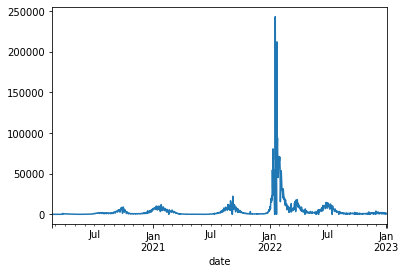

In [ ]:
ts.plot()

In [ ]:
ts = ts.rolling(window=7,min_periods=7).mean()
ts = ts.fillna(0)
# smooth the data

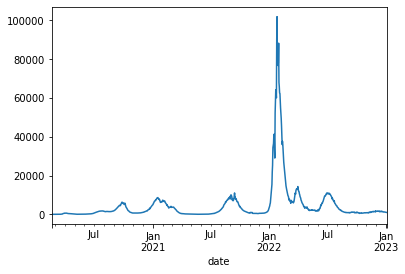

In [ ]:
ts.plot()

# Back to slides

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
ar_mod = ARIMA(ts.values, order=(5, 0, 2)) #(p,d,q) (5, 0, 2)
arma_res = ar_mod.fit()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


386.6851018862271

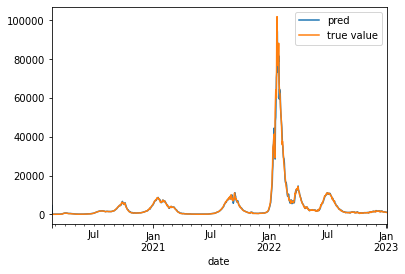

In [ ]:
preds = arma_res.predict()
ar_pred = pd.Series(preds,index=ts.index.values[len(ts)-len(preds):])
pd.DataFrame({'pred':ar_pred,'true value':ts},index=ts.index).plot()
from sklearn.metrics import mean_absolute_error
mean_absolute_error(ts.values[len(ts)-len(ar_pred):], ar_pred)


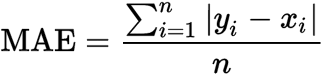

In [ ]:
forecast = arma_res.forecast()
print('forecast for',(ts.index[-1] + pd.DateOffset(days=1)).date(), forecast[0],'CI', forecast[2])



forecast for 2023-01-04 [1027.84720276] CI [[-1912.94170347  3968.63610899]]


So, was this day an anomaly?